* This code is for exploring training data
* This notebook taken from Kaggle Kernel - https://www.kaggle.com/anokas/data-exploration-analysis
* author is - anokas (https://www.kaggle.com/anokas)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

print('# File sizes')
for f in os.listdir('../data'):
    if not os.path.isdir('../data/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('../data/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('../data/'+f+'/'+x)/1000000 for x in os.listdir('../data/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
.DS_Store                     0.0MB
sample_submission_v2.csv      2.0MB
test-jpg                      0.0MB (40669 files)
test-jpg-additional           0.0MB (20522 files)
test_v2_file_mapping.csv      0.0MB
train-jpg                     0.0MB (40479 files)
train_v2.csv                  1.0MB
zip                           3248.0MB (9 files)


In [3]:
df_train = pd.read_csv('../data/train_v2.csv')
df_train.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [4]:
label_values = df_train['tags'].apply(lambda x: x.split(' ')).values

unique_labels = (set(chain.from_iterable(label_values)))
print (unique_labels)

set(['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging'])


In [7]:
label_values = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter
counts = Counter()
for label_list in label_values:
    for label in label_list:
        counts[label] += 1
print counts.keys()
        
data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')
plt.show()

['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']


In [8]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in label_values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / float(c)

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

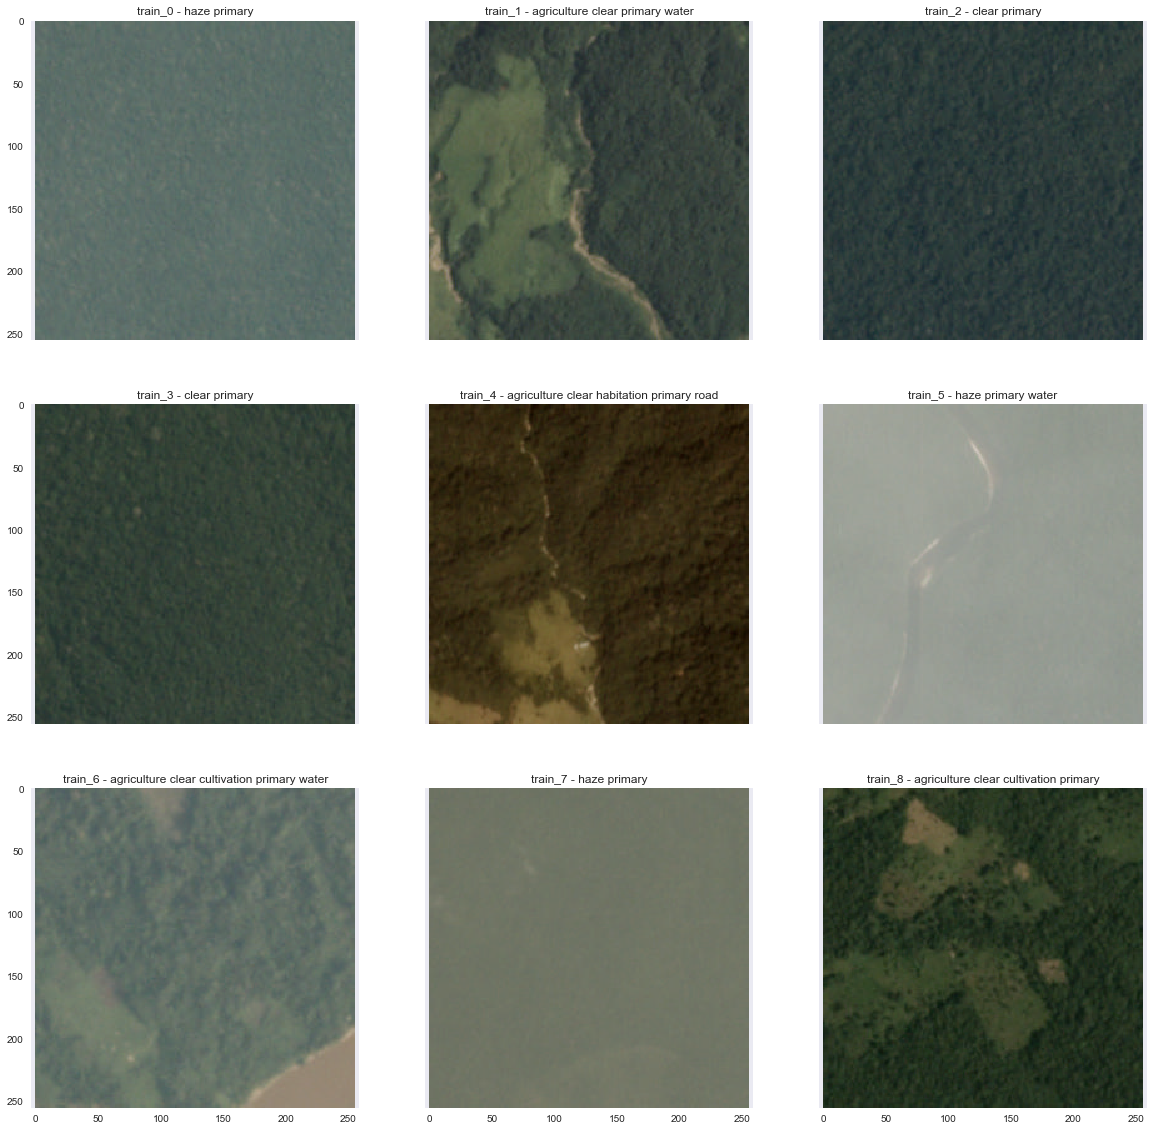

In [6]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
   
i = 0
for f, l  in df_train[:9].values:
    img = cv2.imread('../data/train-jpg/{}.jpg'.format(f))
    ax[i/3 , i % 3 ].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i/3 , i % 3 ].set_title('{} - {}'.format(f, l))
    i += 1

    
plt.show()